<a href="https://colab.research.google.com/github/shruthits02/Python_project/blob/main/Python_web_scraping_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install requests beautifulsoup4 requests-html

In [2]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

In [3]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob

# Define the IMDb URL for a movie's reviews
url = "https://www.imdb.com/title/tt10366206/reviews"
reviews_count = 10  # The number of reviews you want to retrieve

# Define a threshold for classifying reviews as positive or negative
threshold_polarity = 0.0

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all movie reviews on the page
    reviews = soup.find_all('div', class_='text show-more__control')

    if reviews:
        for i, review in enumerate(reviews[:reviews_count]):
            review_text = review.get_text()

            # Perform sentiment analysis using TextBlob
            sentiment = TextBlob(review_text)
            sentiment_polarity = sentiment.sentiment.polarity
            sentiment_subjectivity = sentiment.sentiment.subjectivity

            # Classify the review as positive or negative
            sentiment_category = "Positive" if sentiment_polarity > threshold_polarity else "Negative"

            # Print review and sentiment analysis results for each review
            print(f"Review {i + 1} - Sentiment Analysis:")
            print("Review Text:")
            print(review_text)
            print("Sentiment Analysis:")
            print(f"Polarity: {sentiment_polarity}")
            print(f"Subjectivity: {sentiment_subjectivity}")
            print(f"Review Category: {sentiment_category}")
            print("\n")
    else:
        print("No reviews found on the page.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")


Review 1 - Sentiment Analysis:
Review Text:
Imagine a video game where you are shooting bad guys. Your hardware is old so everything is kind of slow and out of focus. The opponents are set to Easy and you installed a hack to give you invincibility and autoaim. And they come at you slowly, shouting, out in the open, with weapons that fire three or four bullets before they run out and they can shoot anything anyway. They use no snipers, no explosives, no traps of any kind. They can't even hit you when they're next to you and wielding a knife. And you try to fight them in a decent manner, yet your avatar moves like a 60 year old man and even with the autoaim you still suck. And if you somehow get into the many separate levels where nothing make sense, you get a big cinematic that takes you out of it. And because the cinematic is in 4k or whatever, it feels like slow motion.That, my friends, is the experience of watching JW4. The style that people have applauded in the first movie has turn

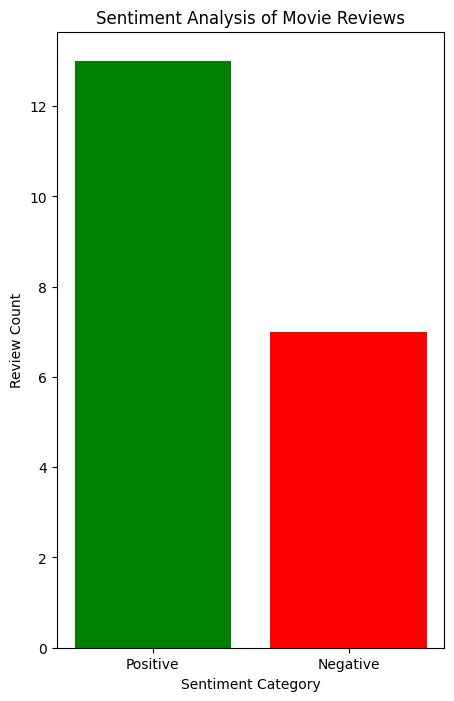

In [4]:
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt

# Define the IMDb URL for a movie's reviews
url = "https://www.imdb.com/title/tt10366206/reviews"
reviews_count = 20  # The number of reviews you want to retrieve
threshold_polarity = 0.0

# Send an HTTP request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find all movie reviews on the page
    reviews = soup.find_all('div', class_='text show-more__control')

    if reviews:
        # Initialize counts for positive and negative reviews
        positive_count = 0
        negative_count = 0

        for i, review in enumerate(reviews[:reviews_count]):
            review_text = review.get_text()

            # Perform sentiment analysis using TextBlob
            sentiment = TextBlob(review_text)
            sentiment_polarity = sentiment.sentiment.polarity

            # Classify the review as positive or negative
            if sentiment_polarity > threshold_polarity:
                positive_count += 1
            else:
                negative_count += 1

        # Define the data for the bar chart
        labels = ['Positive', 'Negative']
        counts = [positive_count, negative_count]

        # Specify colors for each bar
        colors = ['green', 'red']

        # Create a bar chart to visualize the results
        plt.figure(figsize=(5, 8))
        plt.bar(labels, counts, color=colors)
        plt.xlabel('Sentiment Category')
        plt.ylabel('Review Count')
        plt.title('Sentiment Analysis of Movie Reviews')

        # Show the bar chart
        plt.show()
    else:
        print("No reviews found on the page.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")



In [5]:
from matplotlib.container import Container
import requests
from bs4 import BeautifulSoup

# Define the URL
url = "https://www.imdb.com/list/ls576754431/"

# Send an HTTP GET request and parse the HTML content
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find all movie containers
movie_containers = soup.find_all('div',attrs = {'class' : 'lister-item-content'})

# Initialize lists to store movie details
movie_names = []
movie_years = []
movie_times = []
movie_ratings = []
movie_metascores = []
movie_genres = []


# Iterate through each movie container
for container in movie_containers:

    movie_name = container.h3.a.text.strip()
    movie_names.append(movie_name)

    movie_year = container.h3.find("span", class_="lister-item-year text-muted unbold").text.strip("()").strip("I").strip(") ()")
    movie_years.append(movie_year)

    # Check if the runtime element exists
    runtime_element = container.find("span", class_="runtime")
    movie_time = runtime_element.text.strip() if runtime_element else "N/A"
    movie_times.append(movie_time)

    # Check if the rating element exists
    rating_element = container.find("span", class_="ipl-rating-star__rating")
    movie_rating = rating_element.text.strip() if rating_element else "N/A"
    movie_ratings.append("N/A" if movie_rating == "0" else movie_rating)

    meta = container.find("span", class_="metascore").text.strip() if container.find("span", class_="metascore") else 'N/A'
    movie_metascores.append(meta)

    movie_genre = container.find("span", class_="genre").text.strip()
    movie_genres.append(movie_genre)




In [6]:
movie_df = pd.DataFrame({
    'Movie Name': movie_names,
    'Year of Release': movie_years,
    'Duration': movie_times,
    'Movie Rating': movie_ratings,
    'Metascore': movie_metascores,
    'Genre': movie_genres
})


In [7]:
movie_df

,Movie Name,Year of Release,Duration,Movie Rating,Metascore,Genre
0,Oppenheimer,2023,180 min,8.5,88,"Biography, Drama, History"
1,Spider-Man: Across the Spider-Verse,2023,140 min,8.7,86,"Animation, Action, Adventure"
2,Mission: Impossible - Dead Reckoning Part One,2023,163 min,7.8,81,"Action, Adventure, Thriller"
3,John Wick: Chapter 4,2023,169 min,7.7,78,"Action, Crime, Thriller"
4,Killers of the Flower Moon,2023,206 min,8.1,89,"Crime, Drama, History"
5,Dune: Part Two,2024,150 min,N/A,N/A,"Action, Adventure, Drama"
6,Past Lives,2023,105 min,8,94,"Drama, Romance"
7,Anatomy of a Fall,2023,151 min,7.9,87,"Crime, Drama, Thriller"
8,A Haunting in Venice,2023,103 min,6.7,63,"Crime, Drama, Horror"
9,Indiana Jones and the Dial of Destiny,2023,154 min,6.6,58,"Action, Adventure, Sci-Fi"


In [8]:
movie_df.to_csv('movie_df.csv', index=False)

In [9]:
import requests
from bs4 import BeautifulSoup
import os

# URL of the IMDb list
url = "https://www.imdb.com/list/ls576754431/"

# Send an HTTP GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Create a BeautifulSoup object to parse the HTML
    soup = BeautifulSoup(response.text, "html.parser")

    # Find all image elements with the "loadlate" class
    img_elements = soup.find_all("img", class_="loadlate")

    # Directory to save the images
    save_directory = "imdb_images"
    os.makedirs(save_directory, exist_ok=True)

    # Download and save each image
    for img in img_elements:
        img_url = img["loadlate"]
        img_name = img["alt"]
        img_data = requests.get(img_url).content

        # Save the image to the specified directory
        with open(os.path.join(save_directory, f"{img_name}.jpg"), "wb") as img_file:
            img_file.write(img_data)

    print(f"{len(img_elements)} images have been saved to {save_directory}.")

else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


34 images have been saved to imdb_images.


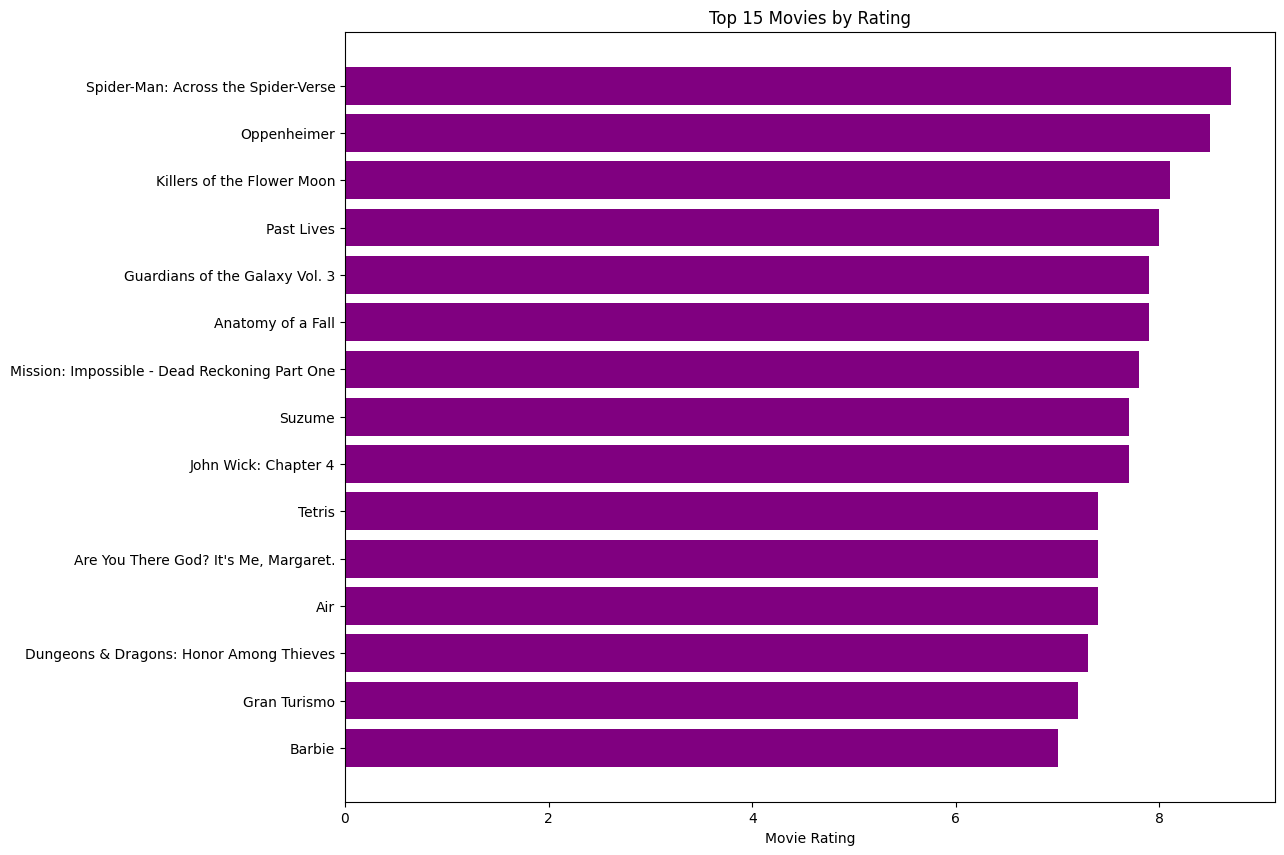

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'Movie Name': [
        'No One Will Save You', 'Indiana Jones and the Dial of Destiny', 'Asteroid City',
        'A Haunting in Venice', 'Beau Is Afraid', 'Bottoms', 'Barbie', 'Gran Turismo',
        'Dungeons & Dragons: Honor Among Thieves', 'Air', "Are You There God? It's Me, Margaret.",
        'Tetris', 'John Wick: Chapter 4', 'Suzume', 'Mission: Impossible - Dead Reckoning Part One',
        'Anatomy of a Fall', 'Guardians of the Galaxy Vol. 3', 'Past Lives', 'Killers of the Flower Moon',
        'Oppenheimer', 'Spider-Man: Across the Spider-Verse'
    ],
    'Movie Rating': [
        6.3, 6.6, 6.6, 6.7, 6.8, 6.9, 7, 7.2, 7.3, 7.4, 7.4, 7.4, 7.7, 7.7, 7.8, 7.9, 7.9, 8, 8.1, 8.5, 8.7
    ]
}

df = pd.DataFrame(data)

df = df.sort_values(by='Movie Rating', ascending=False).head(15)

# Create a bar chart for the top 15 movies
plt.figure(figsize=(12, 10))
plt.barh(df['Movie Name'], df['Movie Rating'], color='purple')
plt.xlabel('Movie Rating')
plt.title('Top 15 Movies by Rating')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest rating at the top
plt.show()


In [11]:
import pandas as pd

# Sample data (replace this with your actual data)
data = {
       'Movie Rating': [
        6.3, 6.6, 6.6, 6.7, 6.8, 6.9, 7, 7.2, 7.3, 7.4, 7.4, 7.4, 7.7, 7.7, 7.8, 7.9, 7.9, 8, 8.1, 8.5, 8.7
    ]
}


df = pd.DataFrame(data)

mean_rating = df['Movie Rating'].mean()
median_rating = df['Movie Rating'].median()
std_dev_rating = df['Movie Rating'].std()

print("Average (Mean) Movie Rating:", mean_rating)
print("Median Movie Rating:", median_rating)
print("standard deviation movie rating:", std_dev_rating)


Average (Mean) Movie Rating: 7.423809523809524
Median Movie Rating: 7.4
standard deviation movie rating: 0.6472285237107229
